In [1]:
from utils import *
from sklearn.manifold import TSNE
from datetime import datetime
import time
import math
import os
a4_dims = (11.7,11.7)
sns.set_context("paper", font_scale = 1.5, rc={"lines.linewidth":2.5})

# Reading in result data
#TODO FIGURE OUT HOW TO SHOW ERROR ON THE PLOTS

In [2]:
#reading in data and averaging.
# final dataframe should look like: average_over_#_run_epoch:1_slot_losses,average_over_#_run_epoch:1_intent_losses .... average_over_#_run_epoch200:
num_runs = 5
num_epochs = 200
embedding_types = [2,4,8,16,32,64,128,256]

In [3]:
# search experiment_results directory https://stackoverflow.com/questions/1724693/find-a-file-in-python
def find(name, path):
    for root, dirs, files in os.walk(path):
        if name in files:
            return os.path.join(root, name)

In [4]:
def find_by_embedding(num_runs,embed=2):
    runs_for_embed = []
    for run in range(num_runs):
        pattern = 'rnn'+str(run)+'_'+str(embed)+'_train_experiment.csv'
        runs_for_embed.append(find(pattern,'experiment_results/'))
    return runs_for_embed

In [5]:
from functools import reduce
def avg_by_run(embed_runs):
    dfs = []
    for embed_run in embed_runs:
        temp_df = pd.read_csv(embed_run)
        dfs.append(temp_df)
    # collect them
    collected = reduce(lambda x, y: x.add(y, fill_value=0), dfs)
    return collected/len(embed_runs)
        

In [6]:
def avg_over_epoch(collected_runs,num_epochs,loss_type="slot_losses"):
    collected_mean = collected_runs.mean()
    avg_slot_losses = []
    for epoch_num in range(num_epochs):
        slot_ref_template = "epoch:"+str(epoch_num+1)+"_"+loss_type
        #     #avg_slot_losses['epoch_'+str(epoch_num+1)] = collected_df[slot_ref_template].values
        #     avg_slot_losses.append(collected_df[slot_ref_template].values)
        avg_slot_losses.append(collected_mean[slot_ref_template])
    return avg_slot_losses

In [7]:
# # TEST
# run2s = find_by_embedding(2,2)
# avgrun2s = avg_by_run(run2s)
# epoch_avg = avg_over_epoch(avgrun2s,5)
# epoch_avg 

# Plotting RNN Slot loss curve

In [8]:
x_epochs = [i+1 for i in range(num_epochs)]

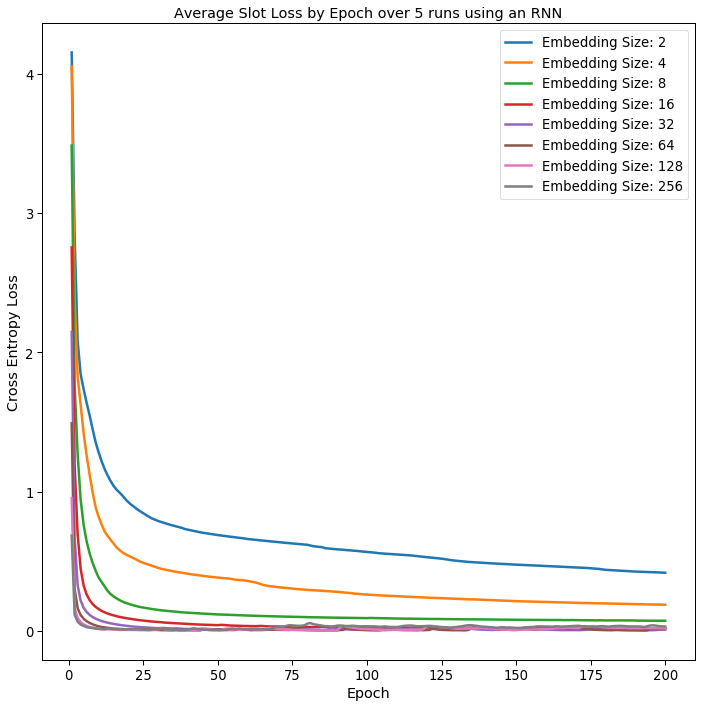

In [9]:
fig, ax = plt.subplots(figsize=a4_dims)
for embedding in embedding_types:
    list_by_runs = find_by_embedding(num_runs,embedding)
    avged_runs = avg_by_run(list_by_runs)
    avged_runs_by_epoch = avg_over_epoch(avged_runs,num_epochs,loss_type="slot_losses")
    ax = sns.lineplot(x=x_epochs,y=avged_runs_by_epoch,label="Embedding Size: "+str(embedding))
    #fig = ax.get_figure()
plt.title('Average Slot Loss by Epoch over 5 runs using an RNN')
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Epoch')
plt.legend()
fig = ax.get_figure()
fig.savefig("graphs/rnn_slot_losses.png",bbox_inches="tight",dpi=300)

# Plotting RNN Intent loss curve

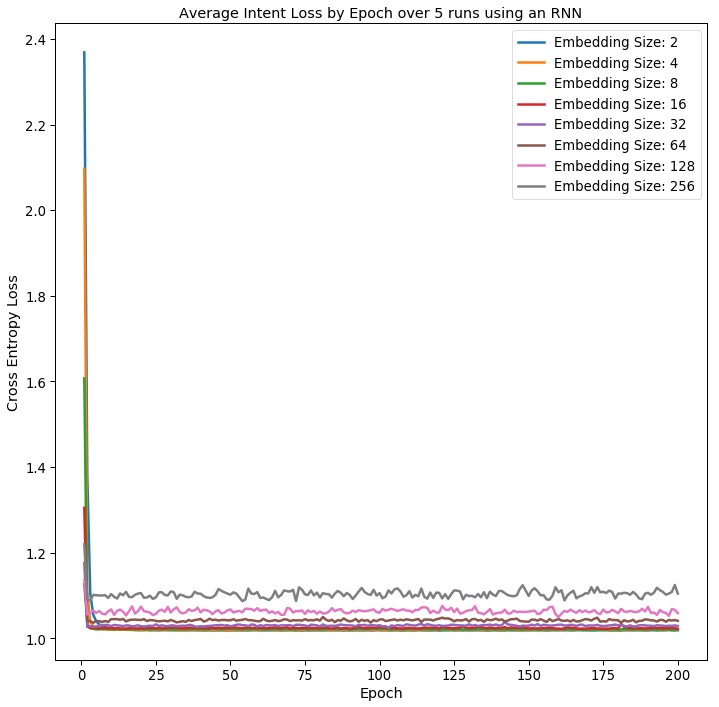

In [10]:
fig, ax = plt.subplots(figsize=a4_dims)
for embedding in embedding_types:
    list_by_runs = find_by_embedding(num_runs,embedding)
    avged_runs = avg_by_run(list_by_runs)
    avged_runs_by_epoch = avg_over_epoch(avged_runs,num_epochs,loss_type="intent_losses")
    ax = sns.lineplot(x=x_epochs,y=avged_runs_by_epoch,label="Embedding Size: "+str(embedding))
    #fig = ax.get_figure()
plt.title('Average Intent Loss by Epoch over 5 runs using an RNN')
plt.ylabel('Cross Entropy Loss')
plt.xlabel('Epoch')
plt.legend()
fig = ax.get_figure()
fig.savefig("graphs/rnn_intent_losses.png",bbox_inches="tight",dpi=300)